In [1]:
import os 
import mne 
import pandas
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib qt

In [2]:
fp=glob('Cropped Data/*.fif')
print(len(fp))

181


### Storing File Paths

In [3]:
hfp= [i for i in fp if 'H' in i.split('\\')[1]]
pfp= [i for i in fp if 'M' in i.split('\\')[1]]

In [4]:
raw= mne.io.read_raw_fif(fp[0])
raw.ch_names

Opening raw data file Cropped Data\6921143_H S15 EO.fif...
Isotrak not found
    Range : 0 ... 25600 =      0.000 ...   100.000 secs
Ready.


C:\Users\Dell\AppData\Local\Temp\ipykernel_14876\540056921.py:1: RuntimeWarning: This filename (Cropped Data\6921143_H S15 EO.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw= mne.io.read_raw_fif(fp[0])


['EEG Fp1-LE',
 'EEG F3-LE',
 'EEG C3-LE',
 'EEG P3-LE',
 'EEG O1-LE',
 'EEG F7-LE',
 'EEG T3-LE',
 'EEG T5-LE',
 'EEG Fz-LE',
 'EEG Fp2-LE',
 'EEG F4-LE',
 'EEG C4-LE',
 'EEG P4-LE',
 'EEG O2-LE',
 'EEG F8-LE',
 'EEG T4-LE',
 'EEG T6-LE',
 'EEG Cz-LE',
 'EEG Pz-LE']

In [5]:
for i in raw.ch_names:
    print(i.split(" ")[1])

Fp1-LE
F3-LE
C3-LE
P3-LE
O1-LE
F7-LE
T3-LE
T5-LE
Fz-LE
Fp2-LE
F4-LE
C4-LE
P4-LE
O2-LE
F8-LE
T4-LE
T6-LE
Cz-LE
Pz-LE


In [6]:
mp = {
    'EEG Fp1-LE' : 'Fp1-LE',
 'EEG F3-LE': 'F3-LE',
 'EEG C3-LE': 'C3-LE',
 'EEG P3-LE': 'P3-LE',
 'EEG O1-LE': 'O1-LE',
 'EEG F7-LE': 'F7-LE',
 'EEG T3-LE': 'T3-LE',
 'EEG T5-LE': 'T5-LE',
 'EEG Fz-LE': 'Fz-LE',
 'EEG Fp2-LE': 'Fp2-LE',
 'EEG F4-LE': 'F4-LE',
 'EEG C4-LE': 'C4-LE',
 'EEG P4-LE': 'P4-LE',
 'EEG O2-LE': 'O2-LE',
 'EEG F8-LE': 'F8-LE',
 'EEG T4-LE': 'T4-LE',
 'EEG T6-LE': 'T6-LE',
 'EEG Cz-LE': 'Cz-LE',
 'EEG Pz-LE': 'Pz-LE'
}

### Reading EEG Data 

In [7]:
def read_data(file_path):
    raw = mne.io.read_raw_fif(file_path, preload = True)
    mne.rename_channels(raw.info, mp)
    loc_file = "BioSemi64.loc"
    montage = mne.channels.read_custom_montage(loc_file)
    raw.info.set_montage(montage)
    return raw

In [8]:
%%capture 
healthy_files=[read_data(i) for i in hfp]
patient_files=[read_data(i) for i in pfp]

Using matplotlib as 2D backend.


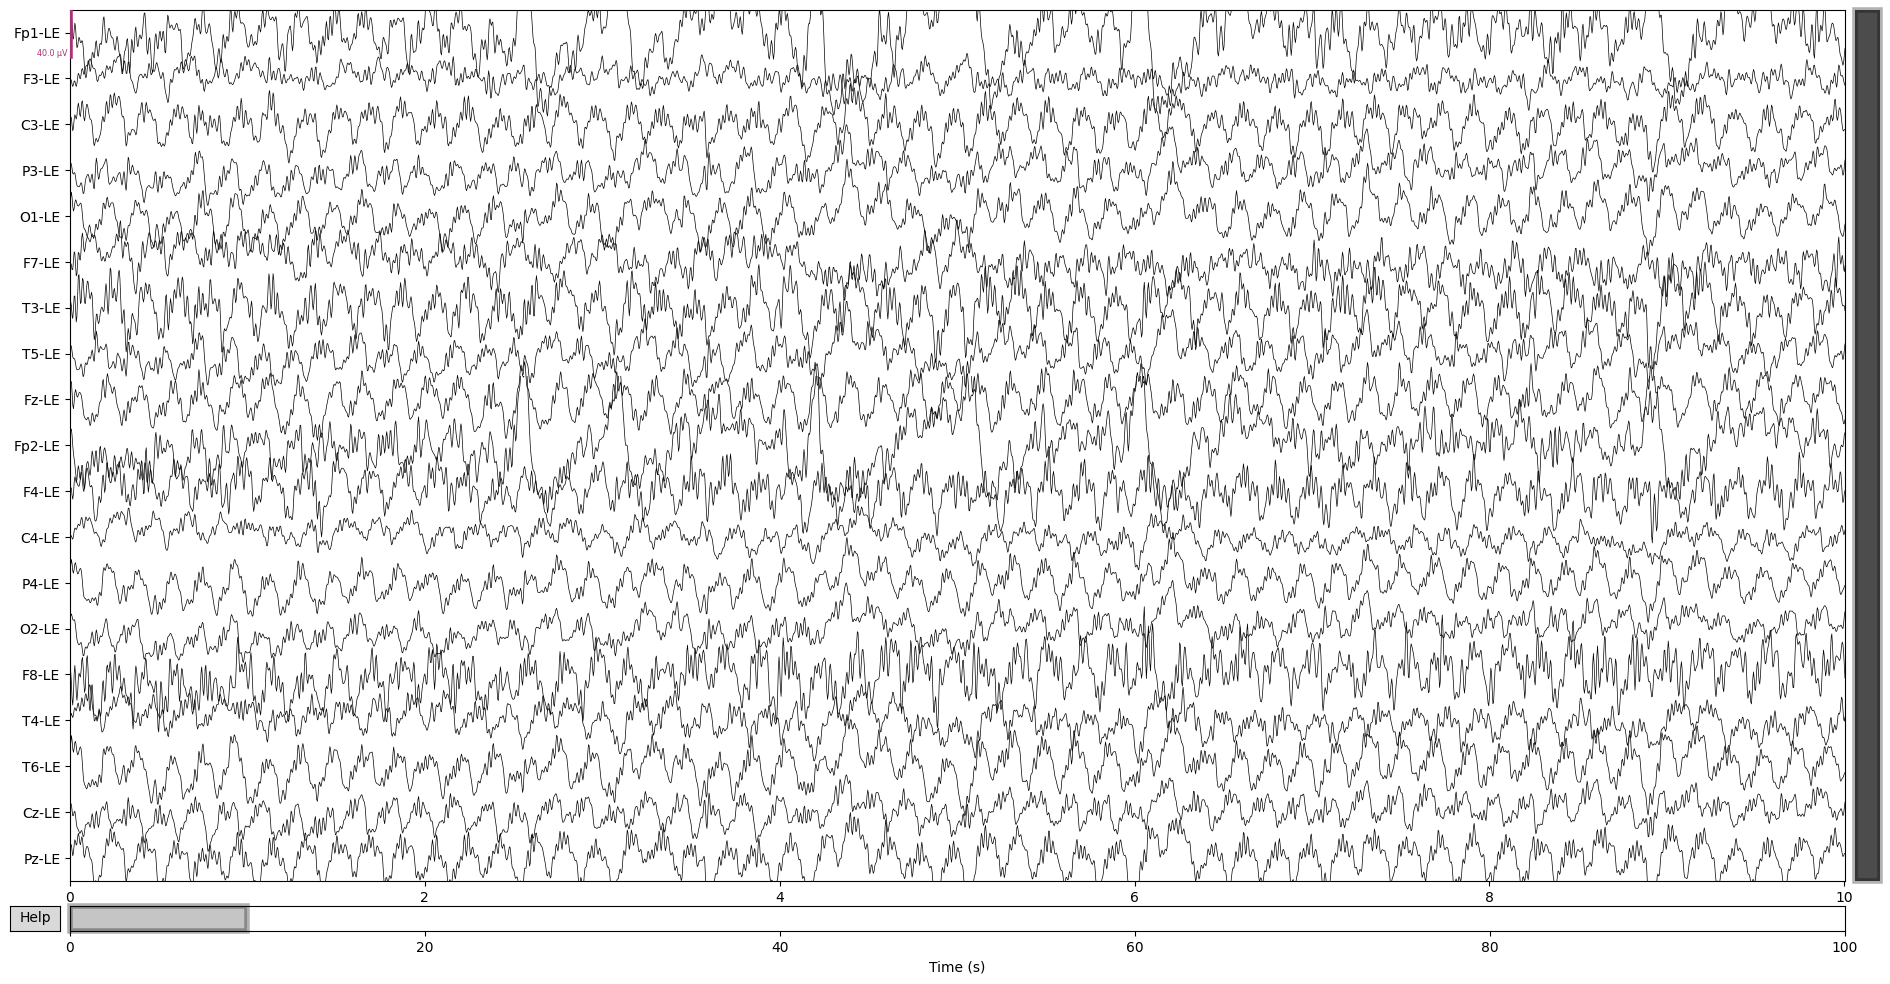

In [9]:
healthy_files[0].plot()

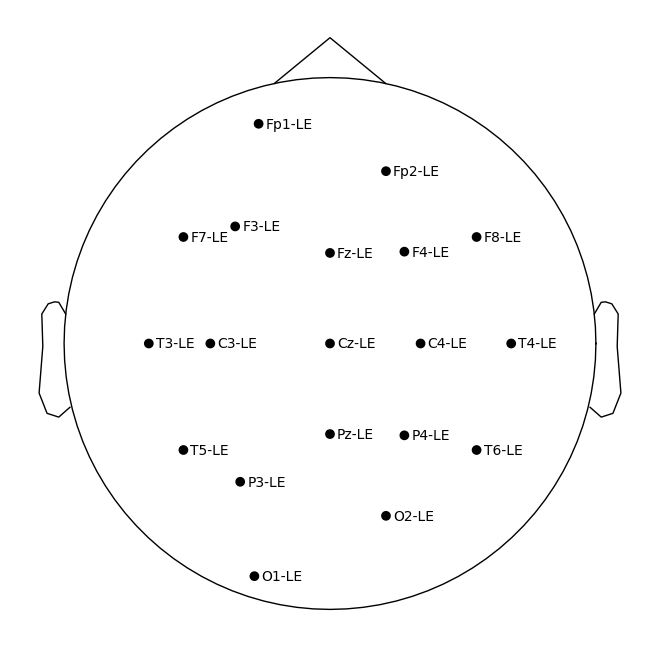

In [10]:
healthy_files[0].plot_sensors(show_names=True, title='EEG Sensor Locations')

### Filtering Data 

In [11]:
def filter(raw_eeg):
    return raw_eeg.filter(l_freq=0.1, h_freq=45) # Using Baseband Filter

In [12]:
%%capture
healthy_files_filtered = [filter(i) for i in healthy_files]
patient_files_filtered = [filter(i) for i in patient_files]

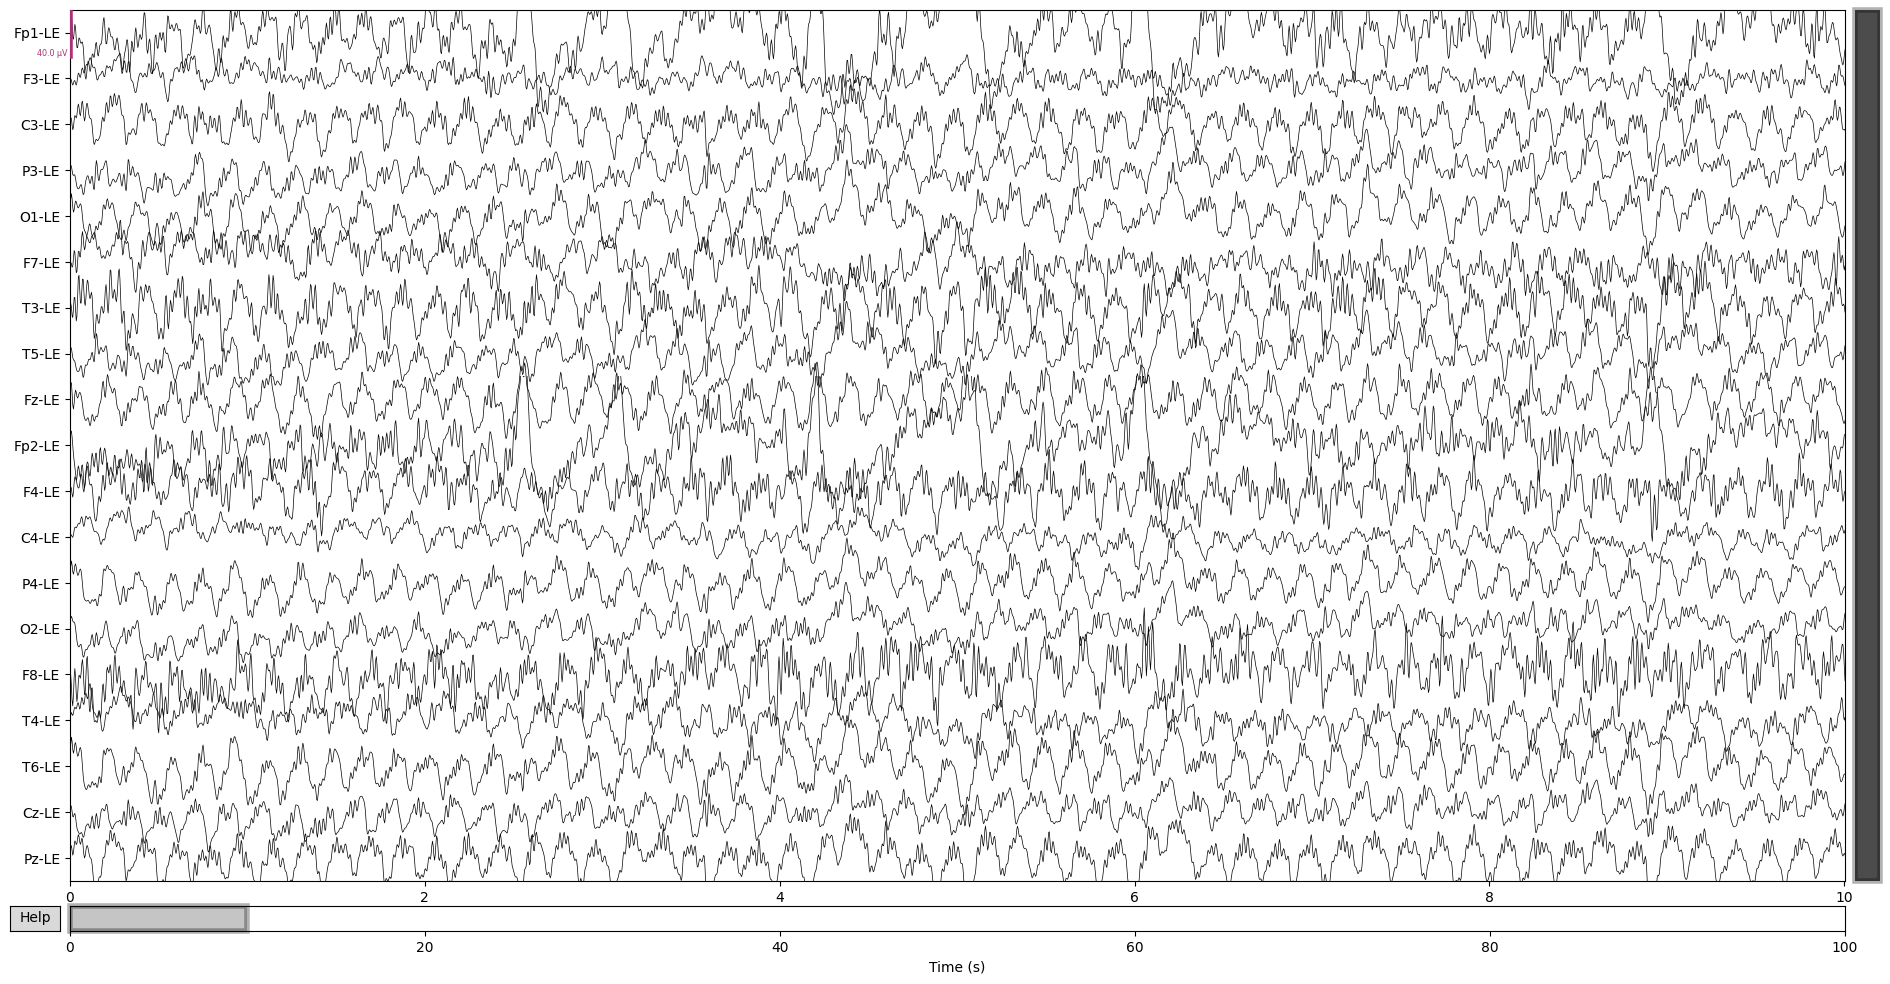

In [13]:
healthy_files_filtered[0].plot()

#### Comparison of PSD Plot of Normal and Depressive Persons

##### Normal Persons

In [14]:
%%capture
fig, ax = plt.subplots(2)
healthy_files[0].compute_psd().plot(axes=ax[0])
healthy_files_filtered[0].compute_psd().plot(axes=ax[1])

ax[0].set_title('PSD of normal person before filtering')
ax[1].set_title('PSD of normal person after filtering')
ax[1].set_xlabel('Frequency (Hz)')

fig.set_tight_layout(True)

manager = plt.get_current_fig_manager()
manager.window.setWindowTitle("Normal Person")
plt.show()

In [15]:
%%capture
fig, ax = plt.subplots(2)
healthy_files[2].compute_psd().plot(axes=ax[0])
healthy_files_filtered[2].compute_psd().plot(axes=ax[1])

ax[0].set_title('PSD of normal person before filtering')
ax[1].set_title('PSD of normal person after filtering')
ax[1].set_xlabel('Frequency (Hz)')

fig.set_tight_layout(True)

manager = plt.get_current_fig_manager()
manager.window.setWindowTitle("Normal Person")
plt.show()

##### Depressive Persons

In [16]:
%%capture
fig, ax = plt.subplots(2)
patient_files[0].compute_psd().plot(axes=ax[0])
patient_files_filtered[0].compute_psd().plot(axes=ax[1])

ax[0].set_title('PSD of Depressive person before filtering')
ax[1].set_title('PSD of Depressive person after filtering')
ax[1].set_xlabel('Frequency (Hz)')

fig.set_tight_layout(True)

manager = plt.get_current_fig_manager()
manager.window.setWindowTitle("Depressive Person")
plt.show()

In [17]:
%%capture
fig, ax = plt.subplots(2)
patient_files[2].compute_psd().plot(axes=ax[0])
patient_files_filtered[2].compute_psd().plot(axes=ax[1])

ax[0].set_title('PSD of Depressive person before filtering')
ax[1].set_title('PSD of Depressive person after filtering')
ax[1].set_xlabel('Frequency (Hz)')

fig.set_tight_layout(True)

manager = plt.get_current_fig_manager()
manager.window.setWindowTitle("Depressive Person")
plt.show()

##### Comparison in Single Graph

In [18]:
%%capture
fig, ax = plt.subplots(2)
healthy_files_filtered[5].compute_psd().plot(axes=ax[0])
patient_files_filtered[3].compute_psd().plot(axes=ax[1])

ax[0].set_title('PSD of normal person')
ax[1].set_title('PSD of depressive person')
ax[1].set_xlabel('Frequency (Hz)')

fig.set_tight_layout(True)

manager = plt.get_current_fig_manager()
manager.window.setWindowTitle("Comparison of PSD")
plt.show()

##### Comparison Using Topograpical Maps

In [19]:
fig, axes = plt.subplots(2, 5, figsize=(25, 5))

healthy_files_filtered[2].compute_psd().plot_topomap(axes=axes[0])
patient_files_filtered[1].compute_psd().plot_topomap(axes=axes[1])

axes[0][2].set_title('PSD Topomap of normal person')
axes[1][2].set_title('PSD Topomap of depressive person')

fig.tight_layout()

manager = plt.get_current_fig_manager()
manager.window.setWindowTitle("Comparison of PSD Topomap")

plt.show()

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\eventloops.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  el.exec() if hasattr(el, 'exec') else el.exec_()


### Preprocessing Using ICA Analysis

In [20]:
%%capture
ica = mne.preprocessing.ICA(n_components=19, random_state=42)
ica.fit(patient_files_filtered[0].copy())

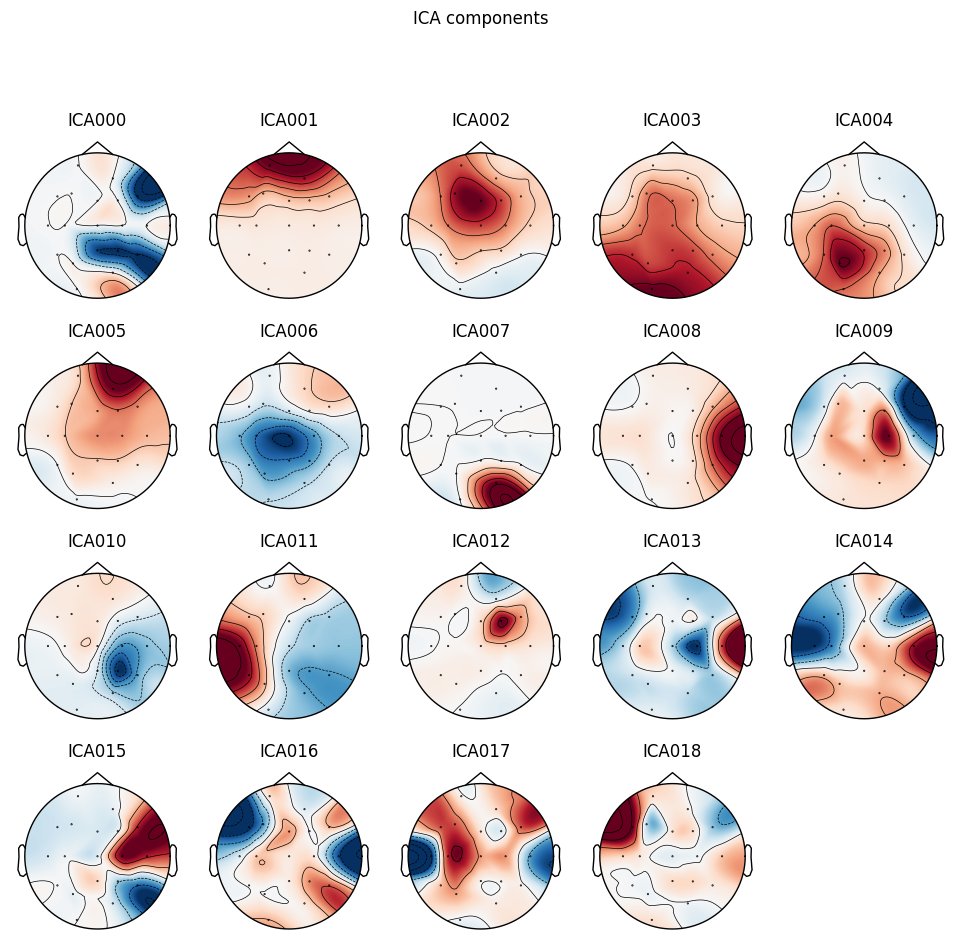

In [21]:
ica.plot_components()

In [22]:
%%capture
bad_idx_eog, scores_eog = ica.find_bads_eog(patient_files_filtered[0], 'Fp1-LE',threshold=2)

In [23]:
print(bad_idx_eog)

[1, 2]


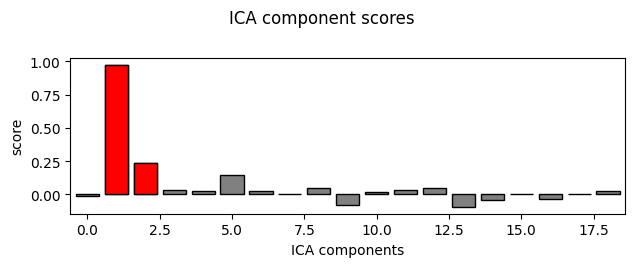

In [24]:
ica.plot_scores(scores_eog, exclude=bad_idx_eog)

In [25]:
bad_idx_muscle, scores_muscle = ica.find_bads_muscle(patient_files_filtered[0])
print(bad_idx_muscle)

Effective window size : 8.000 (s)
[]


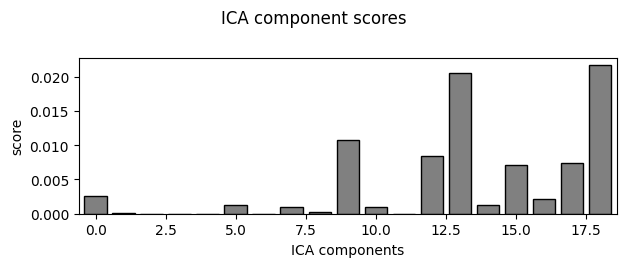

In [26]:
ica.plot_scores(scores_muscle)

In [27]:
ica.exclude+=(bad_idx_eog+bad_idx_muscle)

In [28]:
ica.exclude

[1, 2]

In [29]:
ica.plot_properties(patient_files_filtered[0])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [30]:
epochs=mne.make_fixed_length_epochs(patient_files_filtered[0],duration=5,overlap=1)

Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated


In [31]:
epochs.plot_image()

Using data from preloaded Raw for 24 events and 1280 original time points ...
0 bad epochs dropped
Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


[<Figure size 640x480 with 3 Axes>]

### Preprocessing Using ASR Analysis

In [32]:
epochs = mne.make_fixed_length_epochs(healthy_files_filtered[3],duration=5,overlap=1,preload=True)

Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 1280 original time points ...
0 bad epochs dropped


C:\Users\Dell\AppData\Local\Temp\ipykernel_14876\1666700187.py:1: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs.plot()


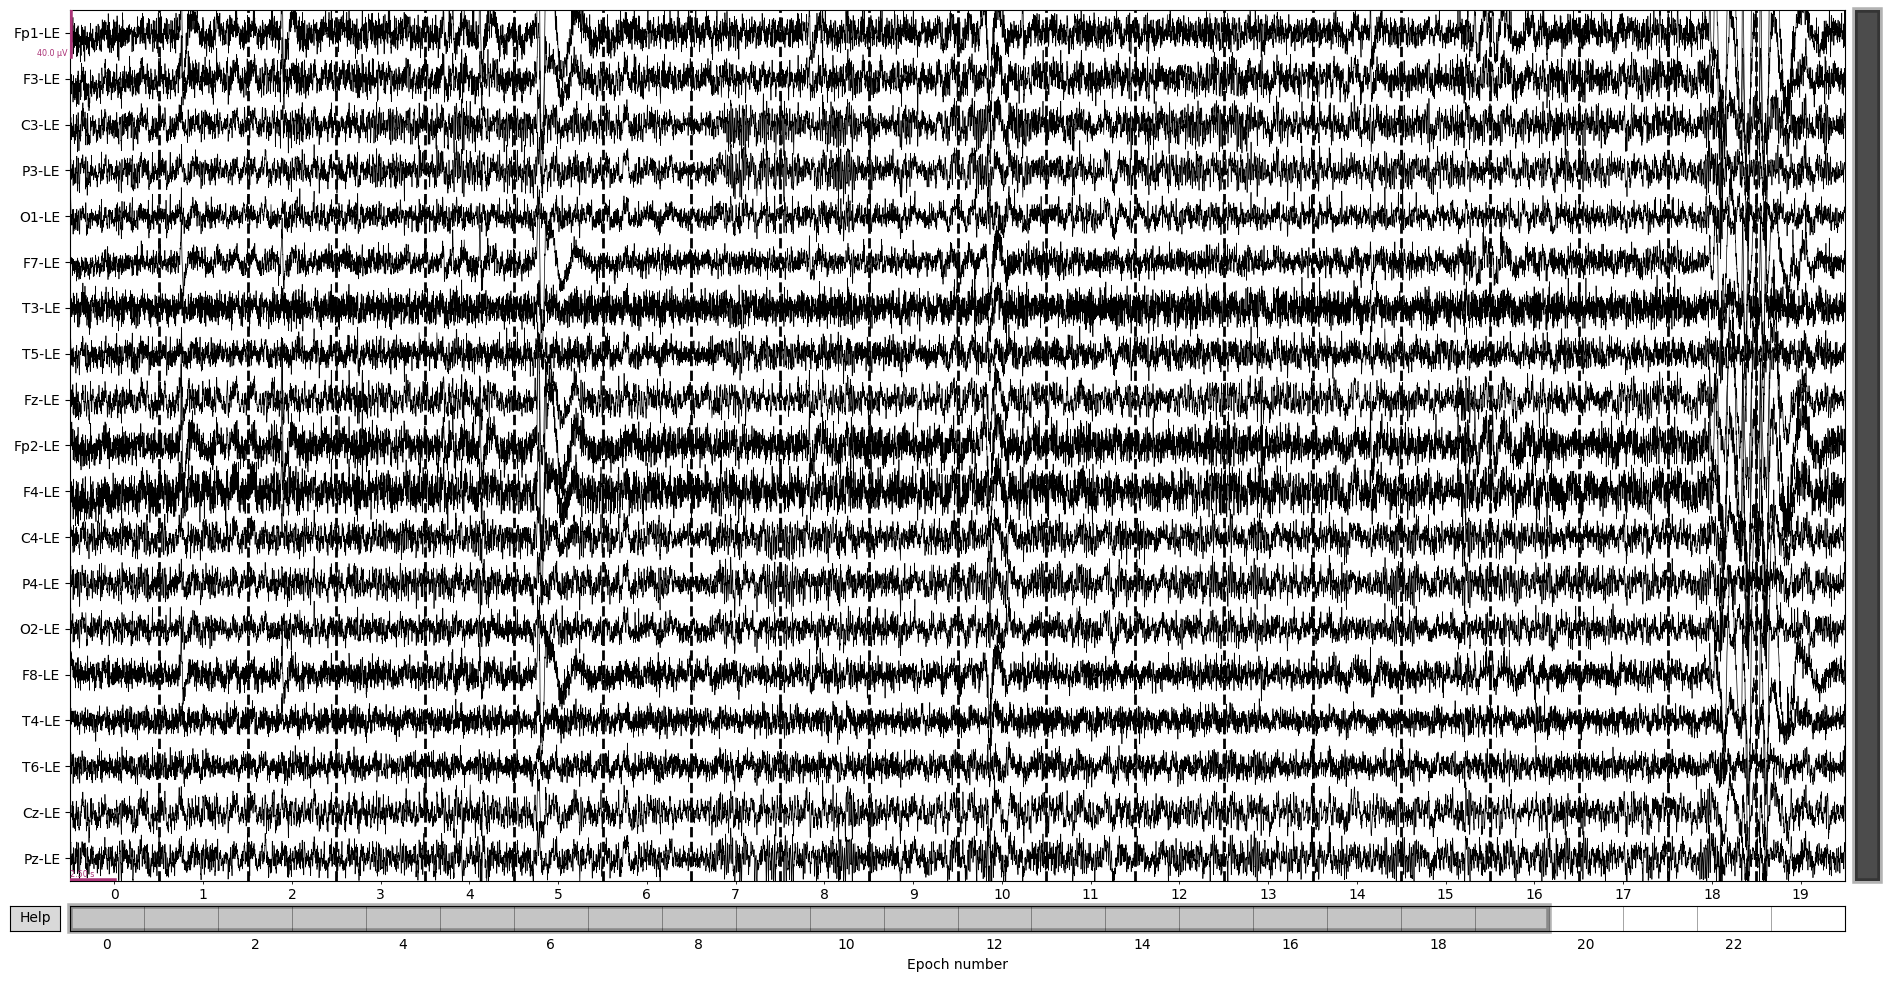

In [33]:
epochs.plot()

In [34]:
from mne.preprocessing import ICA

In [35]:
ica= ICA(n_components=19,random_state=97,max_iter=800)

In [36]:
ica.fit(healthy_files_filtered[3])

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 5.9s.


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


<ICA | raw data decomposition, method: fastica (fit in 800 iterations on 25601 samples), 19 ICA components (19 PCA components available), channel types: eeg, no sources marked for exclusion>

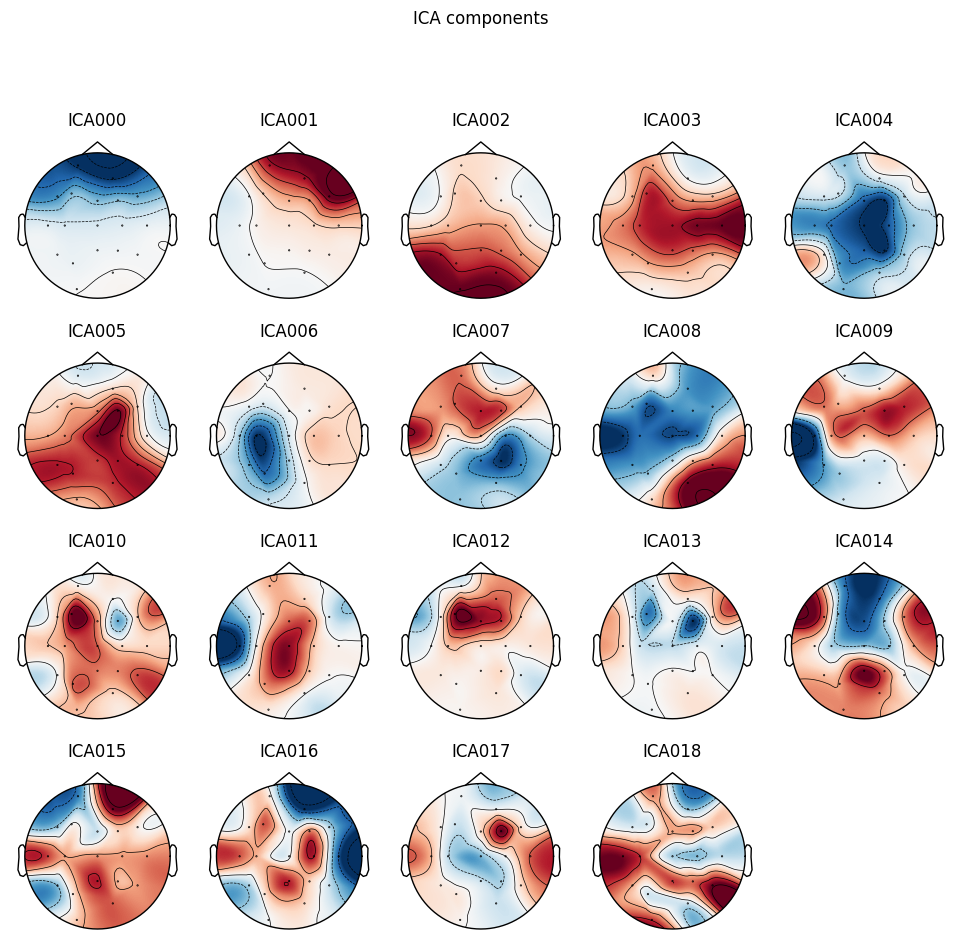

In [37]:
ica.plot_components(picks=range(19))

In [38]:
from autoreject import AutoReject
ar=AutoReject()

In [39]:
epochs_clean,reject_log= ar.fit_transform(epochs,return_log=True)

Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/19 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/19 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/24 [00:00<?,       ?it/s]

Dropped 3 epochs: 5, 18, 19


In [40]:
ica= ICA(n_components=19,random_state=97,max_iter=800)

In [41]:
ica.fit(epochs_clean)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 3.2s.


<ICA | epochs decomposition, method: fastica (fit in 235 iterations on 26880 samples), 19 ICA components (19 PCA components available), channel types: eeg, no sources marked for exclusion>

C:\Users\Dell\AppData\Local\Temp\ipykernel_14876\1011551191.py:1: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs_clean.plot()
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mne\viz\_mpl_figure.py:2373: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(FigureClass=FigureClass, **kwargs)


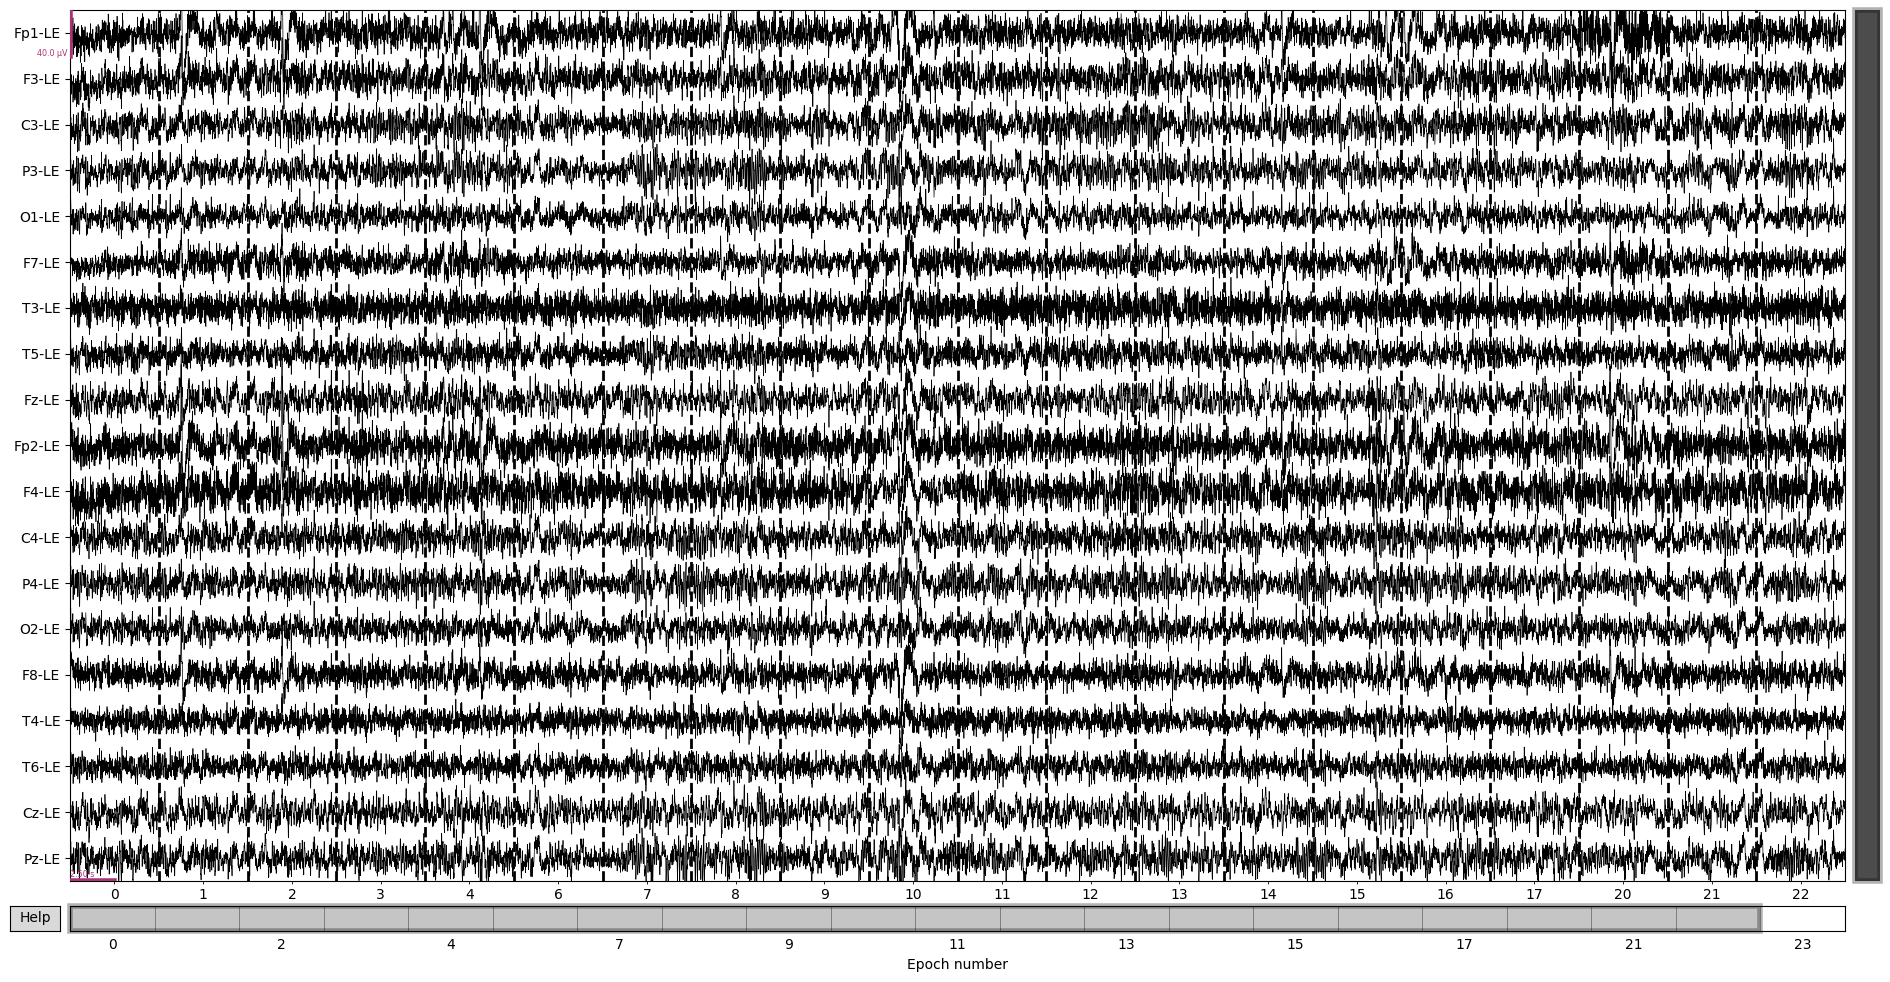

In [42]:
epochs_clean.plot()

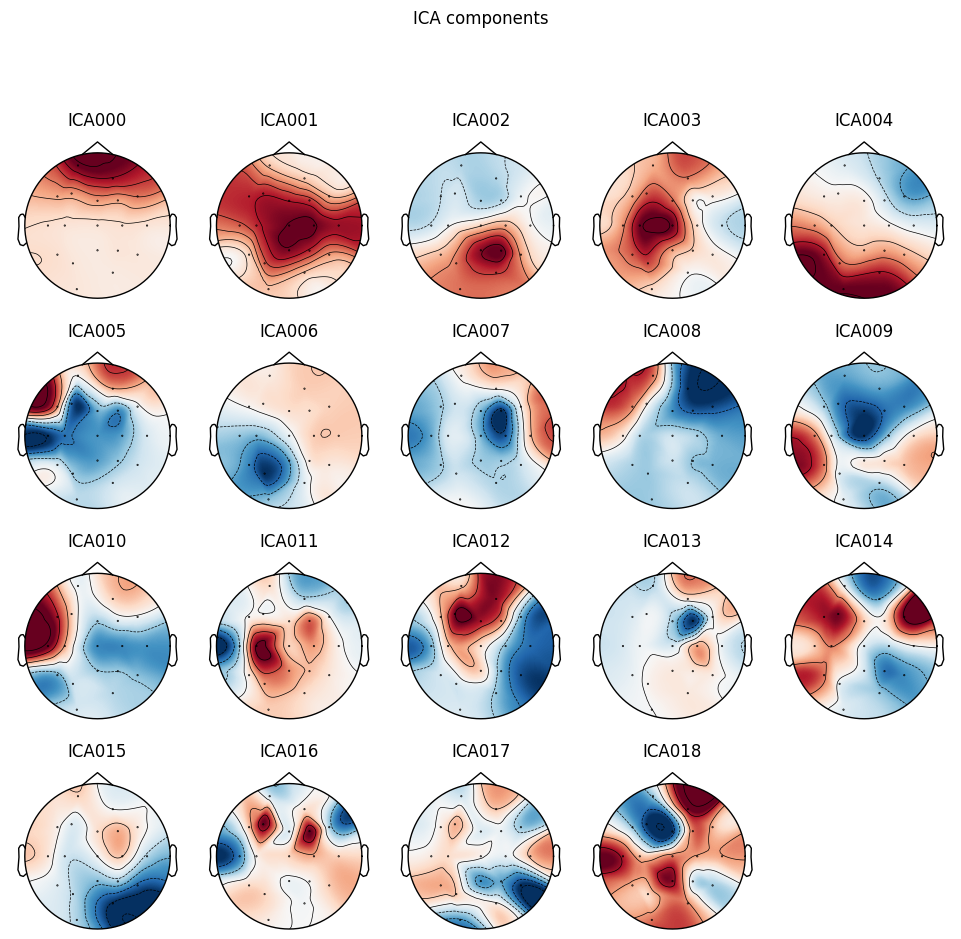

In [43]:
ica.plot_components(picks=range(19))

### Preprocessing all dataset

In [44]:
def preprocess_data(file_path_raw,file_path):
    epochs = mne.make_fixed_length_epochs(file_path_raw,duration=5,overlap=1,preload=True)
    ar=AutoReject()
    epochs_clean,reject_log= ar.fit_transform(epochs,return_log=True)
    output_file_path = "Preprocessed Data\\"+file_path.split('\\')[1].split('.')[0]+".fif"
    epochs_clean.save(output_file_path)

In [45]:
preprocess_data(healthy_files_filtered[3],hfp[3])

Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 24 events and 1280 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/19 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/19 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/24 [00:00<?,       ?it/s]

Dropped 2 epochs: 18, 19


C:\Users\Dell\AppData\Local\Temp\ipykernel_14876\1272071991.py:6: RuntimeWarning: This filename (Preprocessed Data\H S1 EO.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_clean.save(output_file_path)


In [47]:
%%capture
for i,j in zip(healthy_files_filtered,hfp):
    preprocess_data(i,j)

In [48]:
%%capture
for i,j in zip(patient_files_filtered,pfp):
    preprocess_data(i,j)